In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
file_path = "C:\\Users\\User\\Downloads\\q.xlsx"

df = pd.ExcelFile(file_path).parse("Form Responses 1")


In [22]:
df.head()

,Timestamp,Age,Gender,Year of study,Program of Study,Living Arrangement,University Name,How often do you eat breakfast during a typical week?,What is your main reason for skipping breakfast? (Select all that apply),What do you usually consume when you have breakfast? (Select all that apply),...,"Have you ever sought help for stress, anxiety, or mental health concerns?",Do you believe skipping breakfast has a direct impact on your mental health?,How often do you feel energetic and focused during morning classes?,Do you notice a difference in your ability to concentrate on days you skip breakfast?,"What is your current academic performance (e.g., CGPA or equivalent)?",How often do you feel tired or distracted during lectures?,Do you believe skipping breakfast has negatively impacted your academic\nperformance?,What are the main challenges that prevent you from having breakfast?,What steps can universities take to promote healthy breakfast habits among\nstudents?,Do you have any additional comments on how breakfast skipping affects health and\nacademic performance?
0,2024-12-04 13:13:11.335,22-25,Male,2nd year,Science,On-campus,Daffodil international university,Every day,"lack of time, Financial constraints","Cereal, bread, or baked goods, Protein-rich fo...",...,Yes,No,often,"Yes, sligthly worse",Excellent (3.6–4.0),Sometimes,Yes,Financial / lack of time,Canteen should be provide breakfast at least 5...,No
1,2024-12-04 13:21:10.479,22-25,Female,3rd year,Science,On-campus,Daffodil International University,1-3 times a week,lack of time,"Cereal, bread, or baked goods",...,No,Yes,Rarely,"Yes, sligthly worse",Excellent (3.6–4.0),Always,Yes,"Unhealthy food of Hall canteen,Time management...",1.They should provide a healthy and well manag...,Yes..skippong breakfast causes gastric and man...
2,2024-12-04 13:23:25.482,22-25,Male,3rd year,Science,Off-Campus,Daffodil international university,1-3 times a week,Not feeling hungry in the morning,"Cereal, bread, or baked goods",...,Yes,Yes,Always,"Yes, sligthly worse",Good (3.0–3.5),Often,Yes,Daily break fast,Offer healthy breakfast,Yes
3,2024-12-04 13:23:35.336,22-25,Female,3rd year,Science,Off-Campus,Daffodil International University,4-3 times a week,"lack of time, To loss or maintain weight","Cereal, bread, or baked goods, Dairy products ...",...,No,Yes,often,"Yes, significantly worse",Good (3.0–3.5),Sometimes,Yes,Financial / lack of time,low cost based foods provide,No
4,2024-12-04 13:24:16.116,22-25,Female,3rd year,Science,Off-Campus,Daffodil international University,1-3 times a week,lack of time,"Cereal, bread, or baked goods, Fruits or veget...",...,No,Yes,Sometimes,"Yes, sligthly worse",Excellent (3.6–4.0),Often,Yes,Morning time classes and not availability of f...,They can offer healthy breakfast in student fr...,Skipping breakfast make me tired and due to we...


In [19]:
# Rename columns for easier handling

relevant_columns = {
    "Breakfast Frequency": "How often do you eat breakfast during a typical week?",
    "Impact on Mental Health": "Do you believe skipping breakfast has a direct impact on your mental health?",
    "Academic Performance": "What is your current academic performance (e.g., CGPA or equivalent)?",
    "Focus During Classes": "How often do you feel energetic and focused during morning classes?"
}
analysis_df = df[list(relevant_columns.values())].rename(columns=relevant_columns)




In [23]:
analysis_df.head()

,How often do you eat breakfast during a typical week?,Do you believe skipping breakfast has a direct impact on your mental health?,"What is your current academic performance (e.g., CGPA or equivalent)?",How often do you feel energetic and focused during morning classes?
0,Every day,No,Excellent (3.6–4.0),often
1,1-3 times a week,Yes,Excellent (3.6–4.0),Rarely
2,1-3 times a week,Yes,Good (3.0–3.5),Always
3,4-3 times a week,Yes,Good (3.0–3.5),often
4,1-3 times a week,Yes,Excellent (3.6–4.0),Sometimes


In [26]:
analysis_df.columns=["Breakfast Frequency","Impact on Mental Health","Academic Performance","How often do you feel energetic and focused during morning classes?"]

In [35]:
analysis_df

,Breakfast Frequency,Impact on Mental Health,Academic Performance,How often do you feel energetic and focused during morning classes?
0,Every day,No,Excellent (3.6–4.0),often
1,1-3 times a week,Yes,Excellent (3.6–4.0),Rarely
2,1-3 times a week,Yes,Good (3.0–3.5),Always
3,4-3 times a week,Yes,Good (3.0–3.5),often
4,1-3 times a week,Yes,Excellent (3.6–4.0),Sometimes
...,...,...,...,...
395,Rarely or Never,Not sure,Good (3.0–3.5),Always
396,Every day,Yes,Good (3.0–3.5),Sometimes
397,Rarely or Never,Yes,Good (3.0–3.5),Rarely
398,Every day,Yes,Excellent (3.6–4.0),Sometimes


In [28]:
# Set a consistent visual style
sns.set_theme(style="whitegrid")



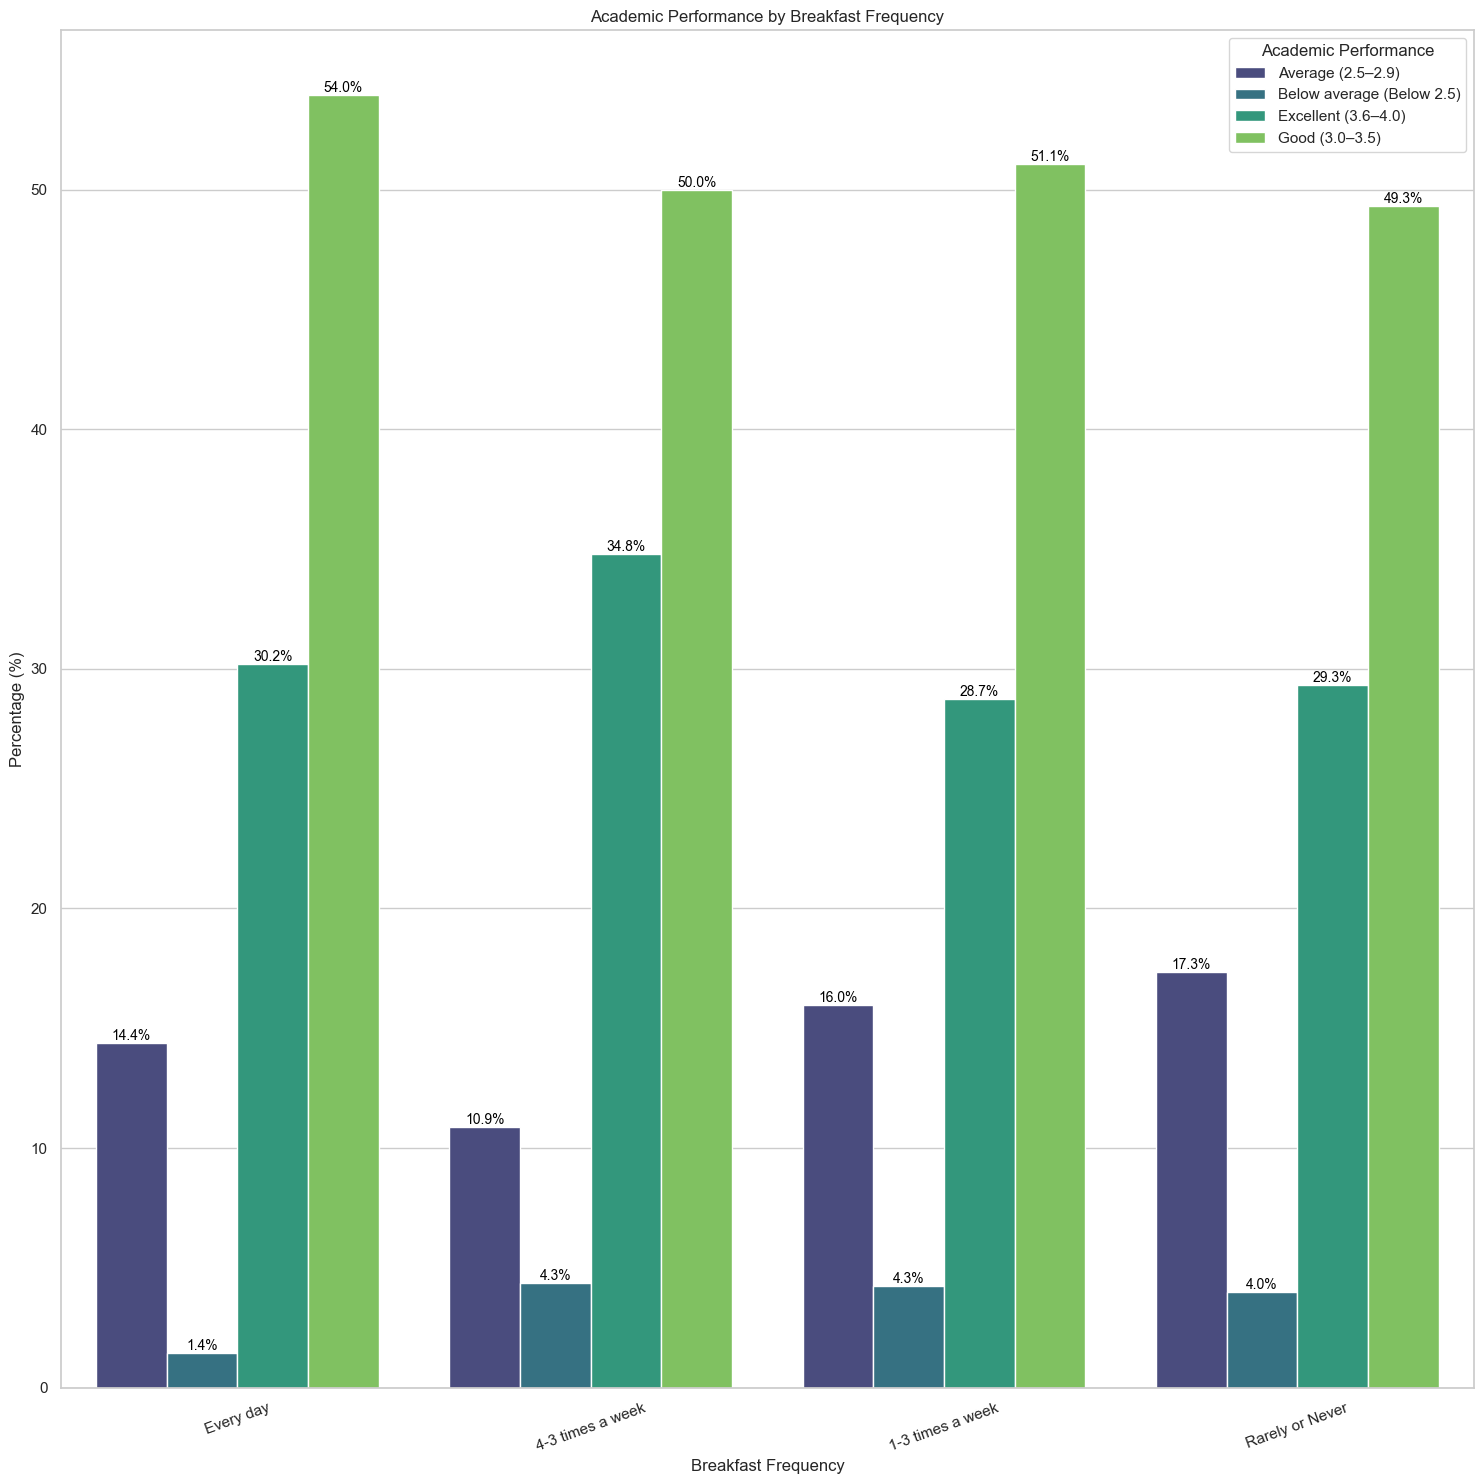

In [40]:
# Plot 1: Breakfast Frequency vs. Academic Performance
# Step 1: Calculate percentages
percentages_df = (
    analysis_df.groupby(["Breakfast Frequency", "Academic Performance"])
    .size()
    .reset_index(name="Count")
)
percentages_df["Percentage"] = (
    percentages_df["Count"]
    / percentages_df.groupby("Breakfast Frequency")["Count"].transform("sum")
    * 100
)

# Step 2: Plot the data
plt.figure(figsize=(15, 15))
ax = sns.barplot(
    data=percentages_df,
    x="Breakfast Frequency",
    y="Percentage",
    hue="Academic Performance",
    palette="viridis",
    order=["Every day", "4-3 times a week", "1-3 times a week", "Rarely or Never"]
)

# Step 3: Add annotations (percentage on top of each bar)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[
            f"{v.get_height():.1f}%" if v.get_height() > 0 else ""
            for v in container
        ],
        label_type="edge",
        fontsize=10,
        color="black",
    )

# Step 4: Customize plot
plt.title("Academic Performance by Breakfast Frequency")
plt.xlabel("Breakfast Frequency")
plt.ylabel("Percentage (%)")
plt.legend(title="Academic Performance")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()





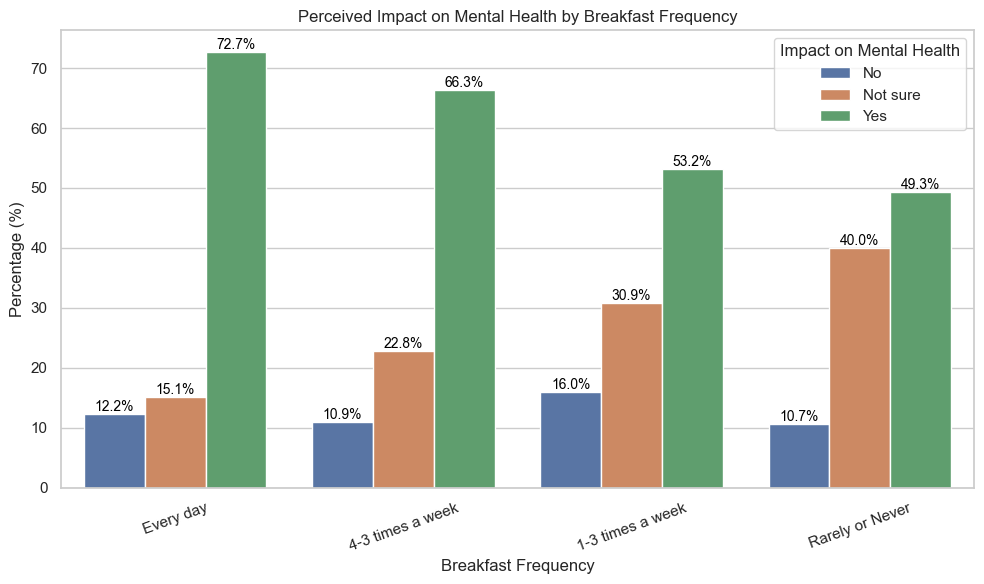

In [44]:
# Step 1: Calculate percentages
percentages_df = (
    analysis_df.groupby(["Breakfast Frequency", "Impact on Mental Health"])
    .size()
    .reset_index(name="Count")
)
percentages_df["Percentage"] = (
    percentages_df["Count"]
    / percentages_df.groupby("Breakfast Frequency")["Count"].transform("sum")
    * 100
)

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=percentages_df,
    x="Breakfast Frequency",
    y="Percentage",
    hue="Impact on Mental Health",
    palette="deep",
    order=["Every day", "4-3 times a week", "1-3 times a week", "Rarely or Never"]
)

# Step 3: Add annotations
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[
            f"{v.get_height():.1f}%" if v.get_height() > 0 else "" 
            for v in container
        ],
        label_type="edge",
        fontsize=10,
        color="black",
    )

plt.title("Perceived Impact on Mental Health by Breakfast Frequency")
plt.xlabel("Breakfast Frequency")
plt.ylabel("Percentage (%)")
plt.legend(title="Impact on Mental Health")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
